In [110]:
#Problem Statement
#Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [111]:
#import the required Python libraries 

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import math as math
import sklearn
from sklearn.metrics import mean_squared_error


In [112]:
#The data set is available in sklearn Python module, so I will access it using scikitlearn.
#I am going to import Boston data set and store it in a variable called boston

from sklearn.datasets import load_boston
boston = load_boston()

In [113]:
#The object boston is a dictionary, so we can explore the keys of this dictionary.
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [114]:
#shape of data
boston.data.shape

(506, 13)

In [115]:
#feature names of boston data set
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [116]:
#description of this data set to know more about it
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [117]:
#convert boston.data into a pandas data frame
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [118]:
#column names are just numbers, so replace those numbers with the feature names
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [119]:
#boston.target contains the housing prices
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [120]:
#add these target prices to the bos data frame
bos['PRICE']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [121]:
# Now I am going to fit a linear regression model and predict the Boston housing prices. 
#I will use the least squares method as the way to estimate the coefficients.

#Y = boston housing price(also called “target” data in Python)
#X = all the other features (or independent variables)

#First, import linear regression from sci-kit learn module.
#Then drop the price column as I want only the parameters as my X values. 
# store linear regression object in a variable called lm.


In [122]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE',axis=1)

lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
#Fitting a Linear Model
#lm.fit() #  fits a linear model
#lm.predict() -> Predict Y using the linear model with estimated coefficients
#lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are 
#replicated by the model, as the proportion of total variation of outcomes explained by the model. 
Y=bos.PRICE

lm.fit(X, Y)
print('Estimated intercept Co-efficient :', lm.intercept_)
print(' ')
print('Number of Co-efficient :', len(lm.coef_))

Estimated intercept Co-efficient : 36.49110328036135
 
Number of Co-efficient : 13


In [124]:
#construct a data frame that contains features and estimated coefficients.
d=pd.DataFrame(dict(zip(X.columns,lm.coef_)), ['features','estimatedCoefficients'])
d.T

,features,estimatedCoefficients
CRIM,-0.107171,-0.107171
ZN,0.046395,0.046395
INDUS,0.020860,0.020860
CHAS,2.688561,2.688561
NOX,-17.795759,-17.795759
RM,3.804752,3.804752
AGE,0.000751,0.000751
DIS,-1.475759,-1.475759
RAD,0.305655,0.305655
TAX,-0.012329,-0.012329


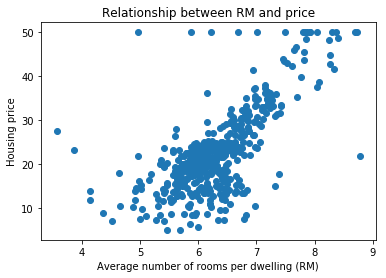

In [125]:
#As you can see from the data frame that there is a high correlation between RM and prices. 
#Lets plot a scatter plot between True housing prices and True RM.

plt.scatter(bos.RM,bos.PRICE)
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Housing price')
plt.title('Relationship between RM and price')
plt.show()

In [126]:
#Predict housing prices using lm.prredict.
lm.predict(X)[:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

In [127]:
#Current Price and Predicted Prices
df_tmp=pd.DataFrame({'Current_Price':bos.PRICE,'Predicted_Price':lm.predict(X)})
df_tmp.head(10)

,Current_Price,Predicted_Price
0,24.0,30.008213
1,21.6,25.029861
2,34.7,30.570232
3,33.4,28.608141
4,36.2,27.942882
5,28.7,25.259400
6,22.9,23.004340
7,27.1,19.534756
8,16.5,11.516965
9,18.9,18.919815


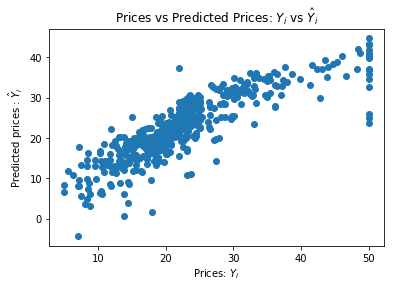

In [128]:
#Compare the True Prices V/S Predicted Prices
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel('Prices: $Y_i$')
plt.ylabel('Predicted prices : $\hat{Y}_i$')
plt.title('Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$')
plt.show()

In [129]:
#calculate mean squared Error
mseFull=np.mean((bos.PRICE-lm.predict(X))**2)
print(mseFull)

21.897779217687496


In [130]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [131]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [132]:
X.shape

(506, 13)

In [133]:
Y.shape

(506,)

In [134]:
#Create Model using OLS and check information
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Tue, 13 Nov 2018   Prob (F-statistic):               0.00
Time:                        11:34:15   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.008      -0.159      -0.024
ZN             0.0487      0.014      3.379      0.001       0.020       0.077
INDUS         -0.0038      0.064     -0.059      0.953      -0.130       0.123
CHAS           2.8564      0.904      3.160      0.002       1.080       4.633
NOX           -2.8808      3.359     -0.858      0.392      -9.481       3.720
RM             5.9252      0.309     19.168      0.000       5.318       6.533
AGE           -0.0072      0.014     -0.523      0.601      -0.034       0.020
DIS           -0.9680      0.196     -4.947      0.000      -1.352      -0.584
RAD            0.1704      0.067      2.554      0.011       0.039       0.302
TAX           -0.0094      0.004     -2.393      0.017      -0.017      -0.002
PTRATIO       -0.3924      0.110     -3.571      0.000      -0.608      -0.177
B              0.0150      0.003      5.561      0.000       0.010       0.020
LSTAT         -0.4170      0.051     -8.214      0.000      -0.517      -0.317
==============================================================================
Omnibus:                      204.050   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1372.527
Skew:                           1.609   Prob(JB):                    9.11e-299
Kurtosis:                      10.399   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:
#Lets take the feature ‘PTRATIO’ and calculate the mean squared error.
lm=LinearRegression()
lm.fit(X[['PTRATIO']],bos.PRICE)
msePTRATIO=np.mean((bos.PRICE-lm.predict(X[['PTRATIO']]))** 2)
print(msePTRATIO)

62.65220001376927


In [136]:
#Split the data for both Train and Test
#we can divide  data sets randomly. Scikit learn provides a function called train_test_split to do this.
#X_train,X_test, Y_train,Y_test=sklearn.model_selection.train_test_split(X,bos.PRICE,test_size=-0.33,random_state=5)
X_test,X_train,Y_test, Y_train=sklearn.model_selection.train_test_split(X,Y,test_size=-0.33,random_state=5)
print(X_train.shape,X_test.shape, Y_train.shape,Y_test.shape)

(340, 13) (166, 13) (340,) (166,)


In [137]:
#build a linear regression model using my  train-test data sets.
lm=LinearRegression()
lm.fit(X_train,Y_train)
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)

#calculate the mean squared error for training and test data and evaluate
#Input
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train-lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test-lm.predict(X_test)) ** 2))
print('RMSE Train', math.sqrt(mean_squared_error(pred_train, Y_train)))
print('RMSE Test' ,math.sqrt(mean_squared_error(pred_test, Y_test)))

Fit a model X_train, and calculate MSE with Y_train: 20.56167159771742
Fit a model X_train, and calculate MSE with X_test, Y_test: 25.656981604667664
RMSE Train 4.534497943291783
RMSE Test 5.0652721155598


In [138]:
#Dataframe for current price and pridected price for training data set
df_tmp=pd.DataFrame({'Current_Price':bos.PRICE[:340],'Predicted_Price':lm.predict(X_train)})
df_tmp.head(10)

,Current_Price,Predicted_Price
0,24.0,37.711852
1,21.6,31.603396
2,34.7,26.634050
3,33.4,4.571672
4,36.2,36.564999
5,28.7,6.430055
6,22.9,28.192575
7,27.1,32.506512
8,16.5,26.523091
9,18.9,22.300560


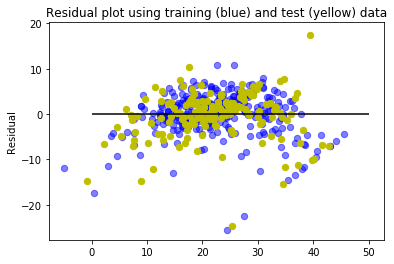

In [139]:
#Residual plots are a good way to visualize the errors in data.  If model is good then pricing data 
#should be randomly scattered around line zero. below plot shows that it is good model.

#Plot using both Train and Test Data with caluclated Residual
plt.scatter(lm.predict(X_train),lm.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test)-Y_test,c='y',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training (blue) and test (yellow) data')
plt.ylabel('Residual')
plt.show()

In [140]:
#Conclusion
#To recap what I have done till now,

#I explored the boston data set and then renamed its column names.
#I explored the boston data set using .DESCR, my goal was to predict the housing prices using the given features.
#I used Scikit learn to fit linear regression to the entire data set and calculated the mean squared error.
#I made a train-test split and calculated the mean squared error for my training data and test data.
#I then plotted the residuals for my training and test datasets

In [141]:
pred_price=lm.predict(np.array([[0.11742,58.0,20.51,0.0,0.3,6.575,65.2,4.4900,1.0,296.0,15.3,796.90,6.98]]))

#print Predicted price
print('Predicted price for the passed values :',pred_price)

Predicted price for the passed values : [39.16746058]
